# 1. Podstawy matematyki oraz rachunku różniczkowego i całkowego
SymPy to przykład systemu algebry komputerowej (CAS, Computer Algebra System). Zamiast reprezentować pierwiastek kwadratowy z 2 jego przybliżoną wartością jako float, zachowuje go dokładnie jako sqrt(2). Przydaje się w sytuacjach, w których można równie dobrze użyć "papieru i ołówka".


In [26]:
import sympy as sp
import sympy.plotting as spp
import math as m 

## Zmienne

Mnożenie zmiennej $x$ w Pythonie:

In [27]:
x = int(input("Wprowadź liczbę: "))
iloczyn = 3 * x
print(iloczyn)

Wprowadź liczbę:  12


36


## Funkcje

Deklarowanie funkcji liniowej $f(x)$ w Pythonie:

In [28]:
def f(x):
    return 2 * x + 1

x_values = [0, 1, 2, 3]

for x in x_values:
    y = f(x)
    print(y)

1
3
5
7


Kreślenie funkcji liniowej $f(x)=2x+1$ w Pythonie za pomocą SymPy:

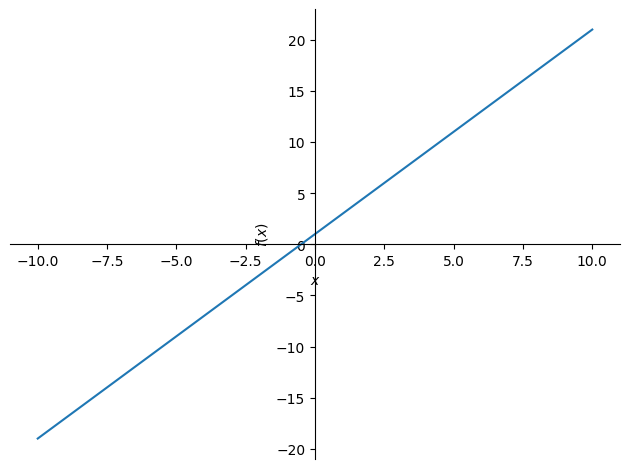

In [29]:
x = sp.symbols('x')
f = 2*x + 1

sp.plot(f);# średnik na końcu wyłącza zwracanie obiektu

Kreślenie funkcji kwadratowej $f(x)=x^2$:

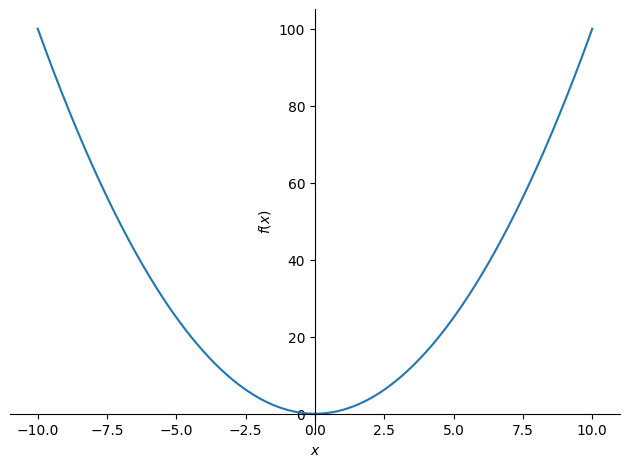

In [30]:
x = sp.symbols('x')
f = x**2
sp.plot(f);

Kreślenie płaszczyzny wartości z dwoma niezależnymi zmiennymi $f(x,y)=2x+3y$:

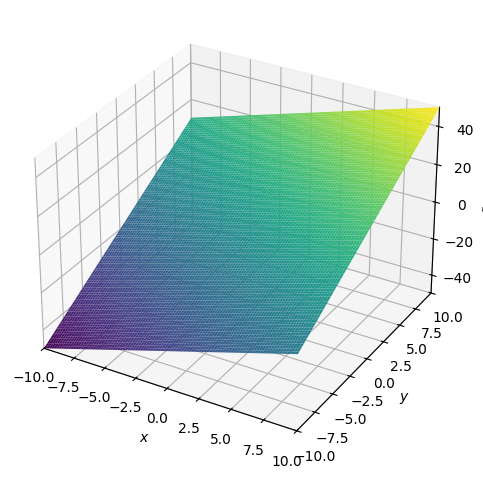

In [31]:
x, y = sp.symbols('x y')
f = 2*x + 3*y
spp.plot3d(f);

## Sumowanie

Wyrażenie $\sum_{i=1}^{5} 2i$ można w Pythonie wykonać za pomocą sum():

In [32]:
suma = sum(2*i for i in range(1, 6))
print(suma)

30


## Logarytmy

Tak obliczamy $\log_{2}8$ (moduł math):

In [33]:
x = m.log(8, 2)
print(x)

3.0


Jeżeli natomiast nie podamy drugiego argumentu (podstawy logarytmu), domyślnie zostanie obliczony logarytm naturalny $\ln$:

In [34]:
x = m.log(5) # logarytm naturalny
print(x)

1.6094379124341003


## Liczba Eulera i logarytmy naturalne

$$\lim_{n \to \infty} \left(1 + \frac{1}{n} \right)^n = e$$

## Granice

Funkcja wykładnicza $f(x)=\frac{1}{x}$ to przykład funkcji o granicy równej 0 przy $x \to \infty$

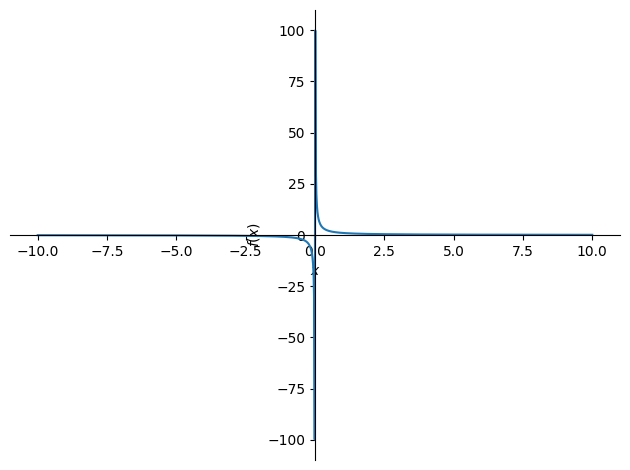

In [35]:
x = sp.symbols('x')
f = 1/x

sp.plot(f);

Obliczanie jej granicy za pomocą SymPy:

In [36]:
x = sp.symbols('x')
f = 1 / x
wynik = sp.limit(f, x, sp.oo) # oo -> nieskończoność

print(wynik)

0


Tak samo możemy obliczyć liczbę Eulera $e$:

In [37]:
n = sp.symbols('n')
f = (1 + (1/n))**n
wynik = sp.limit(f, n, sp.oo)

print(wynik)

E


SymPy automatycznie rozpoznaję tę granicę i wypisuje wynik E, czyli liczbę Eulera. Tak możemy wypisać ją jako float:

In [38]:
n = sp.symbols('n')
f = (1 + (1/n))**n
wynik = sp.limit(f, n, sp.oo)

print(wynik.evalf())

2.71828182845905


## Pochodne
Pochodna informuje nas o nachyleniu funkcji i jest przydatną miarą tempa zmian w dowolnym punkcie funkcji.

Obliczanie pochodnej funkcji $f(x)=x^2$ w SymPy:

In [39]:
# Deklarujemy x i y w SymPy
x = sp.symbols('x')
f = x**2
dx_f = sp.diff(f)

print(dx_f) # 2

# Nachylenie w punkcie x = 2:
print(dx_f.subs(x, 2)) # 4

2*x
4


### Pochodne cząstkowe
Pochodne cząstkowe opisują, jak zmienia się funkcja wielu zmiennych (np. $f(x,y,z)$), gdy zmieniamy tylko jedną z nich, traktując pozostałe jako stałe. 

Dzięki nim możemy badać wpływ każdej zmiennej niezależnie, co jest kluczowe np. w analizie powierzchni czy modelach matematycznych opisujących zjawiska fizyczne.

Obliczanie pochodnych cząstkowych funkcji $f(x,y)=2x^3 + 3y^3$ w SymPy:

In [2]:
x, y = sp.symbols('x y')
f = 2*x**3 + 3*y**3

# Obliczamy pochodne cząstkowe względem x i y
dx_f = sp.diff(f, x)
dy_f = sp.diff(f, y)

print(dx_f)
print(dy_f)

# Tworzymy wykres funkcji z dwoma zmiennymi
spp.plot3d(f);

NameError: name 'sp' is not defined

### Reguła łańcuchowa, czyli pochodna funkcji złożonej
Reguła łańcuchowa pozwala obliczyć pochodną funkcji złożonej, łącząc pochodne jej poszczególnych składników — innymi słowy, jeśli jedna zmienna zależy od drugiej, a ta od jeszcze innej, to zmiana tej ostatniej wpływa na całość poprzez „łańcuch” zależności. 

W sieciach neuronowych reguła ta jest kluczowa dla działania algorytmu wstecznej propagacji błędu (backpropagation), który umożliwia uczenie się sieci poprzez stopniową aktualizację wag na podstawie pochodnych funkcji kosztu względem każdej z wag.

$$\frac{dz}{dx}=\frac{dz}{dy}\times\frac{dy}{dx}$$

Czyli aby obliczyć, jak $z$ zmienia się względem $x$, należy sprawdzić jak $z$ zmienia się względem $y$ i jak $y$ zmienia się względem $x$, a następnie obie te zmiany przemnożyć. Inaczej można to zapisać tak (notacja Lagrange'a):

$$(f(g(x))' = f'(g(x)) \times g'(x)$$

## Całki
Jest to odwrotność pochodnej, która znajduje pole obszaru pod krzywą w danym zakresie.

Chcemy za pomocą całkowania policzyć pole pod funkcją $f(x)=x^2+1$ na przedziale $[0;1]$.

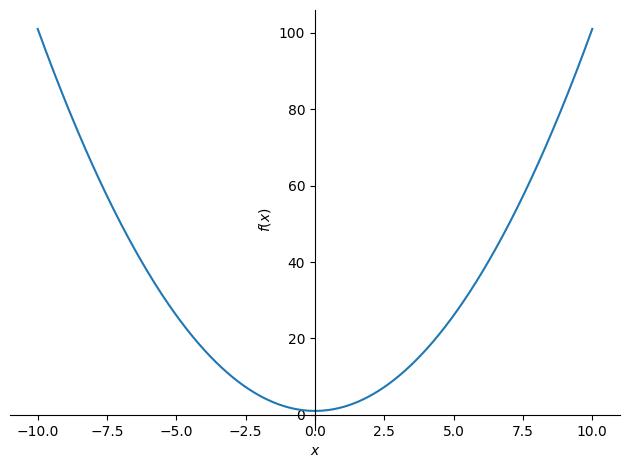

Pole pod krzywą funkcji f(x) na przedziale od 0 do 1: 4/3


In [48]:
# Deklarujemy zmienną i funkcję
x = sp.symbols('x')
f = x**2 + 1

# Obliczamy całkę funkcji względem x w przedziale od 0 do 1
pole = sp.integrate(f, (x, 0, 1))

spp.plot(f);
print(f"Pole pod krzywą funkcji f(x) na przedziale od 0 do 1: {pole}")

Jak widać, jest to liczba wymierna równa $\frac{4}{3}$.

## Ćwiczenia

### 7. Jakie jest nachylenie prostej $f(x)=3x^2+1$ w punkcie $x=3$?

In [49]:
# Deklaracja zmiennej i funkcji
x = sp.symbols('x')
f = 3*x**2 + 1

# Obliczenie pochodnej 
dx_f = sp.diff(f)

print(f"Nachylenie prostej w punkcie x = 3 wynosi: {dx_f.subs(x, 3)}")

Nachylenie prostej w punkcie x = 3 wynosi: 18


### 8. Jakie jest pole obszaru pod krzywą $f(x)=3x^2+1$ w zakresie x od 0 do 2?

In [50]:
# Deklaracja zmiennej i funkcji
x = sp.symbols('x')
f = 3*x**2 + 1

# Obliczamy pole obszaru w zakresie [0, 2]
pole = sp.integrate(f, (x, 0, 2))

print(f"Pole obszaru pod krzywą f(x) w zakresie [0, 2] wynosi: {pole}")

Pole obszaru pod krzywą f(x) w zakresie [0, 2] wynosi: 10
